### EDA

## Humpback whale identification

| 1     | Значение   | 
|------------|-------------|
| Количесство изображений в трейне| 25361 | |
| Количество классов представленных в трейне| 5005 | 



### Распределение классов: 

9664 изображений размечены как new_whale

<img align="center" src="image1.png">





2073 классов имеют только одно изображение 

<img align="center" src="image_3.png"> <img align="center" src="image_2.png">


## Выводы

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from scipy.misc import imread

import pickle

import tensorflow as tf
sns.set()

import os

In [2]:
train_labels = pd.read_csv("humpback-whale-identification/train/train.csv")
train_labels.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [3]:
import pickle
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train_labels['Id'])
pickle.dump(le, open('le.pkl', 'wb'))

train_labels['id_enc'] = train_labels[['Id']].apply(le.transform)

print("Number of unique classes: {}".format(le.classes_.shape[0]))
train_labels.head(2)

Number of unique classes: 5005


,Image,Id,id_enc
0,0000e88ab.jpg,w_f48451c,4786
1,0001f9222.jpg,w_c3d896a,3808


In [4]:
train_unique = train_labels[['Id', 'id_enc' ]].drop_duplicates()
label_names = dict(zip(train_unique.id_enc, train_unique.Id))

In [25]:
df = train_labels.groupby(by=['Id']).count().reset_index().sort_values('Image', ascending=False).reset_index()

In [26]:
train_labels.query('Id == "new_whale"').shape

(9664, 3)

In [27]:
df.query('Image == 1').shape

(2073, 4)

In [28]:
df = df.groupby(by=['Image']).Id.count().reset_index()

In [29]:
df = df.rename(columns={"Image":"count_of_image", "Id":"count_of_class"})

In [30]:
df = df.query('count_of_image >10 ')

In [31]:
df

,count_of_image,count_of_class
10,11,39
11,12,26
12,13,14
13,14,16
14,15,19
15,16,16
16,17,17
17,18,6
18,19,8
19,20,7


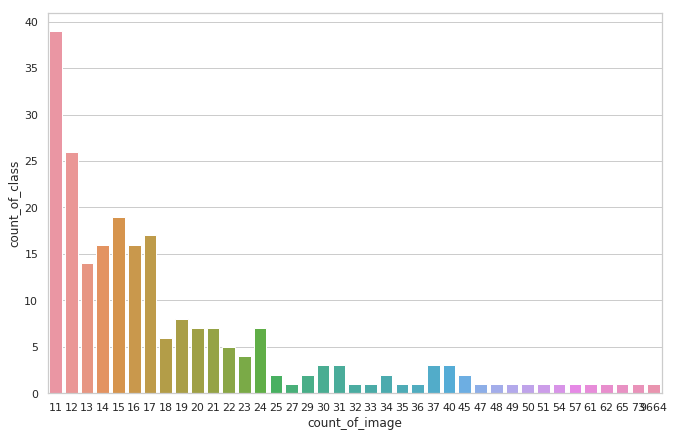

In [35]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(11,7))
ax = sns.barplot(x="count_of_image", y="count_of_class", data=df)